In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

In [2]:
iris = pd.read_csv("data/iris.data")

In [3]:
cls_seq = iris["cls"]
cls_names = list(cls_seq.unique())
cls_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [4]:
Y = np.array([cls_names.index(name) for name in cls_seq])
X0 = np.c_[iris["sl"],iris["sw"],iris["pl"],iris["pw"]]

pca = PCA(2)
X = pca.fit_transform(X0)
X = np.ascontiguousarray(X)

In [99]:
avrfunc = averager_it(func.QuantileFunc(0.9, func.Sqrt(0.001)))
avrfunc = avragg.MWAverage(avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, 3, 
                                    tol=1.0e-8, n_iter=500, n_step=20, h=0.95)

In [100]:
hcd.fit(X)

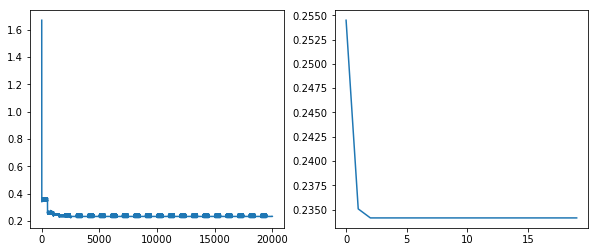

In [101]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hcd.dvals)
plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

In [102]:
xrange1 = np.linspace(-4., 4., 100)
xrange2 = np.linspace(-1.5, 1.5, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D = hcd.evaluate_dist(XX)
C = hcd.evaluate(XX)
CC = np.asarray(C).reshape(XX1.shape)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

4.761134929737135e-05 22.480199646409822


In [103]:
#print(np.asarray(hcd.scatters))

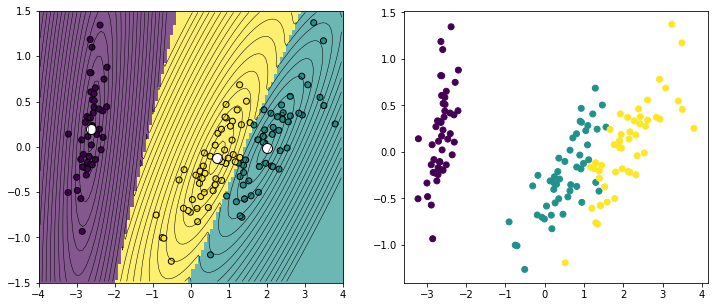

In [104]:
Y_p = hcd.evaluate(X)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(CC, origin='lower', extent=(-4,4,-1.5,1.5), aspect='auto', alpha=0.66)
plt.contour(DD, origin='lower', extent=(-4,4,-1.5,1.5), levels=np.linspace(0.,3,20)**2, colors='k', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c=Y_p, edgecolors='k')
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='w', edgecolors='k', s=100)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### Среднее арифметическое

In [94]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, 3, 
                                    tol=1.0e-8, n_iter=500, n_step=100, h=0.95)

In [95]:
km.fit(X)

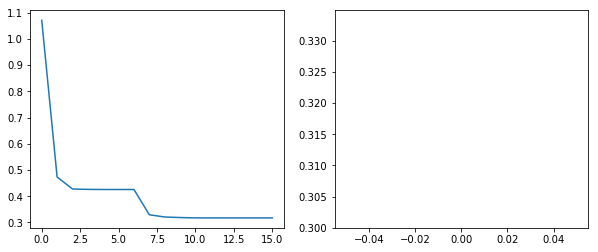

In [96]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [97]:
xrange1 = np.linspace(-4., 4., 100)
xrange2 = np.linspace(-1.5, 1.5, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D = km.evaluate_dist(XX)
C = km.evaluate(XX)
CC = np.asarray(C).reshape(XX1.shape)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

0.00031717895315318696 13.97588882561431


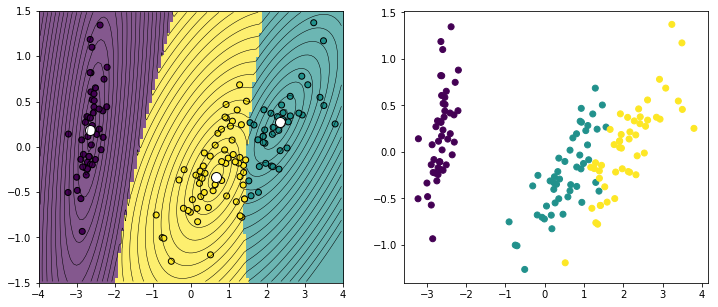

In [98]:
Y_p = km.evaluate(X)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(CC, origin='lower', extent=(-4,4,-1.5,1.5), aspect='auto', alpha=0.66)
plt.contour(DD, origin='lower', extent=(-4,4,-1.5,1.5), levels=np.linspace(0.,3,20)**2, colors='k', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c=Y_p, edgecolors='k')
plt.scatter(km.locs[:,0], km.locs[:,1], c='w', edgecolors='k', s=100)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()